In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
# select the file_path
file_path = './iris/iris.data'

df = pd.read_csv(file_path)

In [3]:
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [8]:
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
print("\nClass distribution:")
print(df['class'].value_counts())

"""
There are 3 classes :
    -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
"""
# spliting the data into training and testing set
features = ['sepal_length','sepal_width','petal_length','petal_length']
target = "class"

X = df[features]
y = df[target]
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


Class distribution:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


In [12]:
# Standardize the features: Reduces chances of skewness as it standardizes the outlier values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# training the knn model
k_values = [3, 5, 7]
distance_metrics = ['euclidean', 'manhattan']
results = []
# outer loop for different k_values and inner loop is for the different distance metrics
for k in k_values:
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        knn.fit(X_train, y_train)
        
        #  Evaluate the model
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        results.append((k, metric, accuracy, precision, recall, f1))

        #  confusion matrix
        print(f"\nConfusion matrix for k={k}, metric={metric}:")
        print(confusion_matrix(y_test, y_pred))

        # Classification report
        print(f"\nClassification report for k={k}, metric={metric}:")
        print(classification_report(y_test, y_pred))
        
results_df = pd.DataFrame(results, columns=['k', 'Metric', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df


Confusion matrix for k=3, metric=euclidean:
[[15  0  0]
 [ 0 13  2]
 [ 0  3 12]]

Classification report for k=3, metric=euclidean:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.81      0.87      0.84        15
 Iris-virginica       0.86      0.80      0.83        15

       accuracy                           0.89        45
      macro avg       0.89      0.89      0.89        45
   weighted avg       0.89      0.89      0.89        45


Confusion matrix for k=3, metric=manhattan:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]

Classification report for k=3, metric=manhattan:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.83      1.00      0.91        15
 Iris-virginica       1.00      0.80      0.89        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93 

,k,Metric,Accuracy,Precision,Recall,F1-Score
0,3,euclidean,0.888889,0.889881,0.888889,0.888765
1,3,manhattan,0.933333,0.944444,0.933333,0.932660
2,5,euclidean,0.866667,0.870287,0.866667,0.866071
3,5,manhattan,0.933333,0.944444,0.933333,0.932660
4,7,euclidean,0.933333,0.944444,0.933333,0.932660
5,7,manhattan,0.933333,0.944444,0.933333,0.932660


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

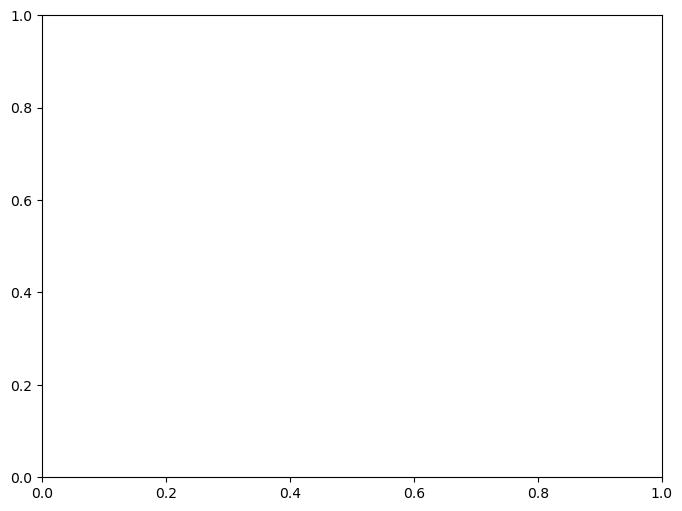

In [20]:
if isinstance(X, pd.DataFrame):
    X_vis = X.iloc[:, :2].values
else:
    X_vis = X[:, :2]
y_vis = y

X_vis_train, X_vis_test, y_vis_train, y_vis_test = train_test_split(X_vis, y_vis, test_size=0.3, random_state=42, stratify=y_vis)
scaler_vis = StandardScaler()
X_vis_train = scaler_vis.fit_transform(X_vis_train)
X_vis_test = scaler_vis.transform(X_vis_test)

knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_vis_train, y_vis_train)

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ['red', 'green', 'blue']

    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)

    for idx, color in enumerate(cmap_bold):
        plt.scatter(X[y == idx, 0], X[y == idx, 1], c=color, label=iris.target_names[idx], edgecolor='k')

    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title("Decision Boundaries (k=3, Euclidean distance)")
    plt.legend()
    plt.show()

plot_decision_boundaries(X_vis_test, y_vis_test, knn)
